In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
df=pd.read_csv('Social_Network_Ads.csv')
df.drop(['User ID'],axis=1,inplace=True)
df=df.replace({'Male':1, 'Female':0})

In [57]:
X=df[['Age','EstimatedSalary']]
Y=df['Purchased']

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)


In [58]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [59]:
y_pred=model.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
cm

array([[58,  0],
       [22,  0]], dtype=int64)

In [60]:
# True Positive (TP)
tp = cm[1, 1]
# False Positive (FP)
fp = cm[0, 1]
# True Negative (TN)
tn = cm[0, 0]
# False Negative (FN)
fn = cm[1, 0]

# Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Error Rate
error_rate = (fp + fn) / (tp + tn + fp + fn)

# Precision
if tp+fp>0:
	precision = tp / (tp + fp)

# Recall
if tp+fn>0:
	recall = tp / (tp + fn)

In [61]:
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Confusion Matrix:
[[58  0]
 [22  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1344: U

In [62]:
x,y=df.drop(['Purchased'],axis=1),df['Purchased']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [63]:

sc_scale=StandardScaler()
xtrain=sc_scale.fit_transform(xtrain)
xtest=sc_scale.transform(xtest)

In [64]:
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [65]:
y_pred=classifier.predict(xtest)

In [66]:
cm=confusion_matrix(ytest,y_pred)
print("Confusion matrix : \n",cm)

Confusion matrix : 
 [[65  3]
 [ 7 25]]


<Axes: >

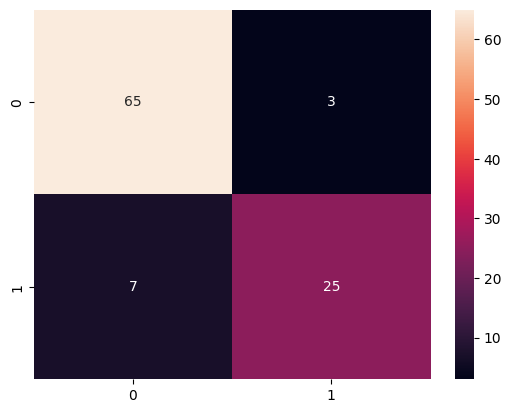

In [67]:
sns.heatmap(cm,annot=True)